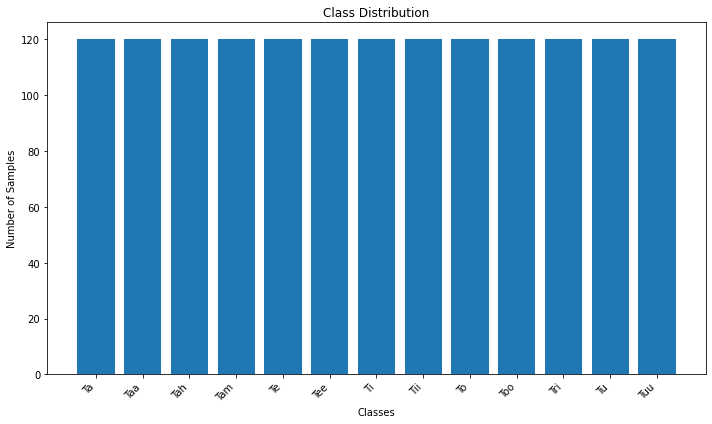

In [1]:

import os
import numpy as np
from PIL import Image, ImageOps
import umap
import matplotlib.pyplot as plt

# Set the path to the base directory containing 13 subfolders
base_data_dir = "C:\\Users\\91758\\Downloads\\padded images"

# Create a list of subdirectories within the base directory
subdirs = [os.path.join(base_data_dir, subdir) for subdir in os.listdir(base_data_dir)]

# Filter out non-directory entries
subdirs = [subdir for subdir in subdirs if os.path.isdir(subdir)]

# Set image dimensions
image_width, image_height = 256, 256

# Create empty lists to store image data and labels
image_data = []
labels = []

# Load and preprocess images from each subdirectory
for subdir in subdirs:
    subdir_name = os.path.basename(subdir)
    for image_file in os.listdir(subdir):
        image_path = os.path.join(subdir, image_file)
        image = Image.open(image_path).convert("L")
        image = ImageOps.fit(image, (image_width, image_height), method=Image.LANCZOS)
        image_array = np.array(image)
        image_data.append(image_array)
        labels.append(subdir_name)

# Convert data and labels to NumPy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Count the occurrences of each class
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Create a histogram plot
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, label_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()
